# 第2回：画像データの基本、画像処理アルゴリズム

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 画像の表示

### 基礎

[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 ...

 [[ 60  18  84]
  [ 60  18  84]
  [ 58  27  92]
  ...
  [ 84  73 173]
  [ 76  68 172]
  [ 79  62 177]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]]


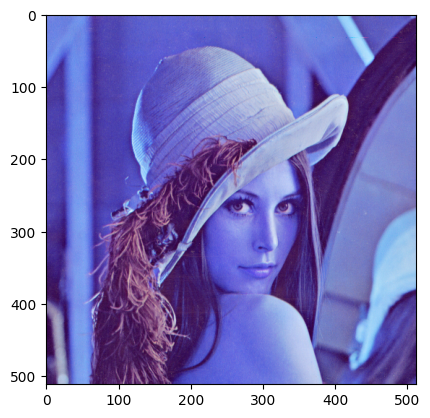

In [2]:
# 画像データの読み込み
img_lenna = cv2.imread("./imgs/lenna.png")

# 画像情報の表示
print(img_lenna)

# 画像の表示
plt.imshow(img_lenna)
plt.show()


OpenCV はデフォルトで BGR (Blue, Green, Red)  
pyplot では RGB (Red, Green, Blue)

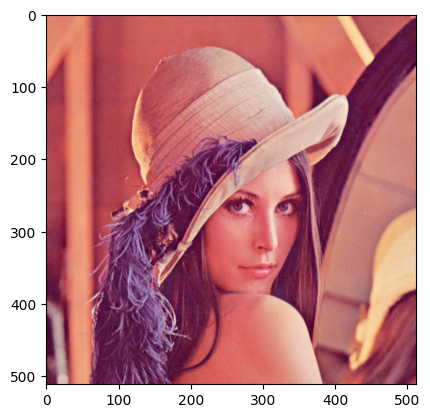

In [3]:
# 画像データの読み込み
img_lenna = cv2.imread("./imgs/lenna.png")
img_lenna = cv2.cvtColor(img_lenna, cv2.COLOR_BGR2RGB)  # BGR to RGB

# 画像の表示
plt.imshow(img_lenna)
plt.show()

### 演習 2-0
OpenCV で画像を読み込み、pyplot で表示しなさい。

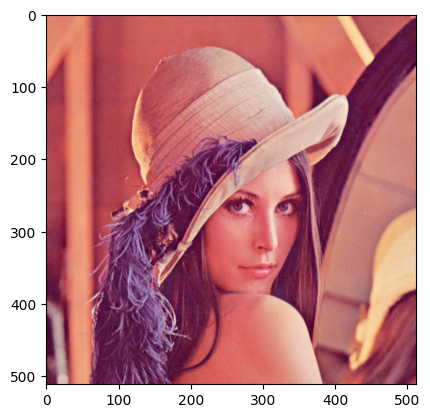

In [4]:
# 画像データの読み込み
img = cv2.imread("./imgs/lenna.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR to RGB

# 画像の表示
plt.imshow(img)
plt.show()

### HSV 色空間への変換

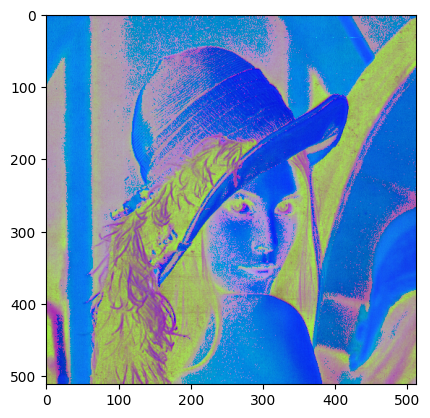

In [13]:
img_lenna = cv2.imread("./imgs/lenna.png")
img_lenna = cv2.cvtColor(img_lenna, cv2.COLOR_BGR2HSV)  # BGR to HSV

# 画像の表示（RGB空間）
plt.imshow(img_lenna)
plt.show()

HSV 色空間で何らかの操作をして RGB 空間に戻す

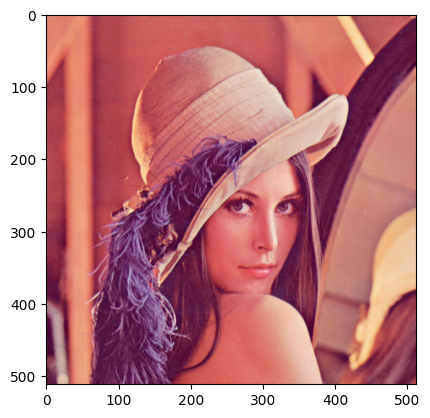

In [29]:
img_lenna = cv2.imread("./imgs/lenna.png")
img_lenna = cv2.cvtColor(img_lenna, cv2.COLOR_BGR2HSV)  # BGR to HSV

img_lenna[:, :, 0] = img_lenna[:, :, 0]   # Hue (色相: 0～180)
img_lenna[:, :, 1] = img_lenna[:, :, 1]   # Saturation (彩度: 0～255)
img_lenna[:, :, 2] = img_lenna[:, :, 2]   # Value (明度: 0～255)

img_lenna = cv2.cvtColor(img_lenna, cv2.COLOR_HSV2RGB)  # HSV to RGB

# 画像の表示
plt.imshow(img_lenna)
plt.show()

### 演習 2-1 色相、彩度、明度の操作により、以下の画像に近い画像を作成しなさい。

In [5]:
def controlle_hsv(img_hsv, h, s, v):

    img_hsv[:, :, 0] = img_hsv[:, :, 0] + h   # Hue (色相: 0～180)
    img_hsv[:, :, 1] = img_hsv[:, :, 1] + s   # Saturation (彩度: 0～255)
    img_hsv[:, :, 2] = img_hsv[:, :, 2] + v   # Value (明度: 0～255)

    return img_hsv

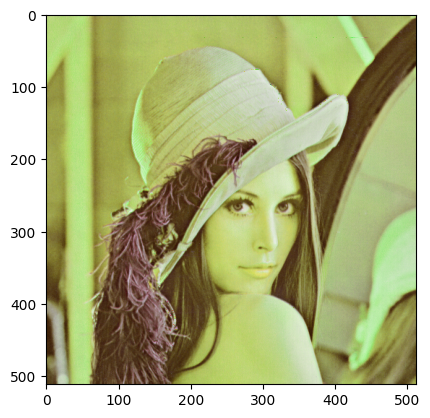

In [94]:
img_lenna = cv2.imread("./imgs/lenna.png")
img_lenna_hsv = cv2.cvtColor(img_lenna, cv2.COLOR_BGR2HSV)  # BGR to HSV

img_lenna_hsv = controlle_hsv(img_lenna_hsv, 35, -20 , -10)

img_lenna_rgb = cv2.cvtColor(img_lenna_hsv, cv2.COLOR_HSV2RGB)  # HSV to RGB

# 画像の表示
plt.imshow(img_lenna_rgb)
cv2.imwrite("./imgs/exercise2_1_1.png", img_lenna_rgb)
plt.show()

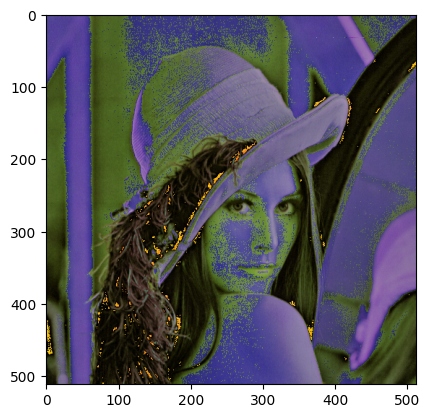

In [95]:
img_lenna = cv2.imread("./imgs/lenna.png")
img_lenna_hsv = cv2.cvtColor(img_lenna, cv2.COLOR_BGR2HSV)  # BGR to HSV

img_lenna_hsv = controlle_hsv(img_lenna_hsv, 120, 10, 180)

img_lenna_rgb = cv2.cvtColor(img_lenna_hsv, cv2.COLOR_HSV2RGB)  # HSV to RGB

# 画像の表示
plt.imshow(img_lenna_rgb)
cv2.imwrite("./imgs/exercise2_1_2.png", img_lenna_rgb)
plt.show()

### グレースケールへの変換

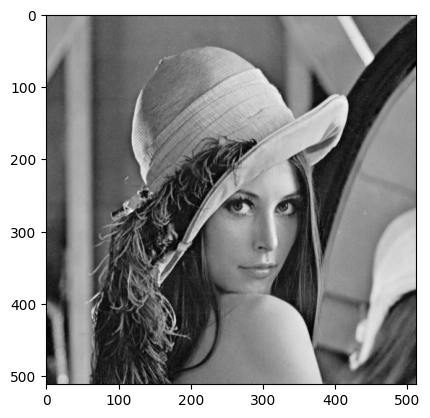

In [74]:
# 画像データの読み込み（グレースケール化）
img_lenna = cv2.imread("./imgs/lenna.png")
img_lenna = cv2.cvtColor(img_lenna, cv2.COLOR_BGR2GRAY) # BGR to GRAY

# 画像の表示（グレースケール表示）
plt.imshow(img_lenna)
plt.gray()
plt.show()

## 画像の保存

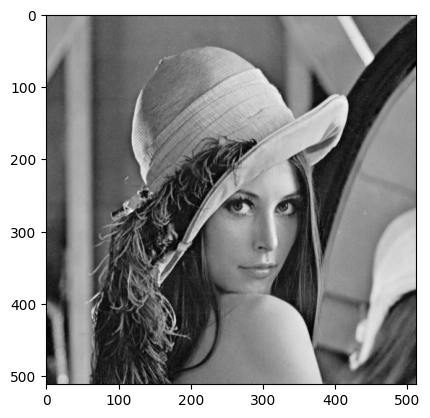

In [77]:
# 画像データの読み込み（グレースケール化）
img_lenna = cv2.imread("./imgs/lenna.png")
img_lenna = cv2.cvtColor(img_lenna, cv2.COLOR_BGR2GRAY) # BGR to GRAY

# 画像の表示（グレースケール表示）
plt.imshow(img_lenna)
plt.gray()
plt.savefig("./imgs/lenna_gray.png")
cv2.imwrite("./imgs/lenna_output.png", img_lenna)
plt.show()

## 画像のリサイズとトリミング

### 画像サイズの確認

In [79]:
img_lenna = cv2.imread("./imgs/lenna.png")

# サイズの表示
print(img_lenna.shape) # (height, width, channel) <- opencvの場合

(512, 512, 3)


### リサイズ

(64, 64, 3)


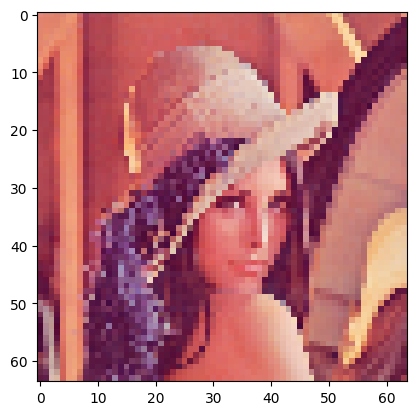

In [82]:
img_lenna = cv2.imread("./imgs/lenna.png")
img_lenna_resize = cv2.resize(img_lenna, (64, 64))

# サイズの表示
print(img_lenna_resize.shape) # (height, width, channel)

# 画像の表示
plt.imshow(cv2.cvtColor(img_lenna_resize, cv2.COLOR_BGR2RGB))
plt.show()

### トリミング

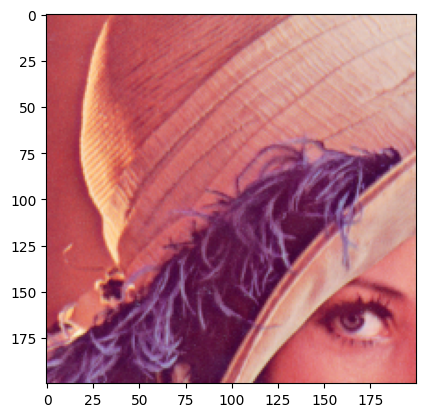

In [83]:
img_lenna = cv2.imread("./imgs/lenna.png")
img_lenna_trim = img_lenna[100:300, 100:300]

# 画像の表示
plt.imshow(cv2.cvtColor(img_lenna_trim, cv2.COLOR_BGR2RGB))
plt.show()

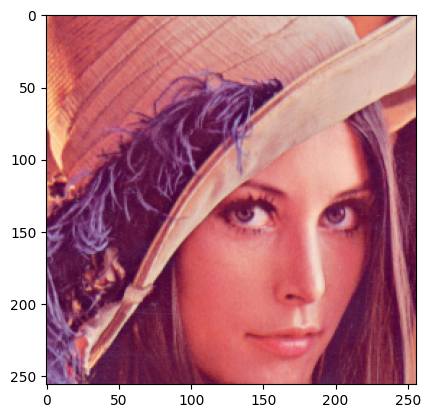

In [84]:
img_lenna = cv2.imread("./imgs/lenna.png")
img_lenna_trim = img_lenna[128:384, 128:384]

# 画像の表示
plt.imshow(cv2.cvtColor(img_lenna_trim, cv2.COLOR_BGR2RGB))
plt.show()

### 演習 2-2
幅 w、高さ h のサイズの画像に対して、画像中央の 0.5w × 0.5h の領域がトリミングされるようなコードを作成しなさい。

(256, 256, 3)


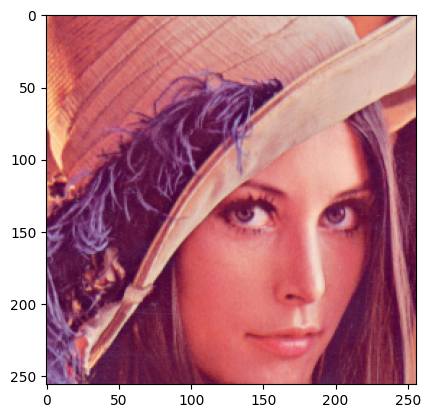

In [96]:
img_lenna = cv2.imread("./imgs/lenna.png")
H = img_lenna.shape[0]
W = img_lenna.shape[1]

img_lenna_trim = img_lenna[int(H/4):int(H*3/4), int(W/4):int(W*3/4)]

# 画像の形状の表示
print(img_lenna_trim.shape) # (height, width, channel)

# 画像の表示
plt.imshow(cv2.cvtColor(img_lenna_trim, cv2.COLOR_BGR2RGB))
cv2.imwrite("./imgs/exercise2_2.png", img_lenna_trim)
plt.show()

### 演習 2-3
どのようなサイズの画像に対しても、中央の 128×128 ピクセルがトリミングされるようなコードを作成しなさい。 今回は 128×128 よりも小さい画像については考えなくても良いものとするが、対応したコードになっていることが好ましい。

(128, 128, 3)


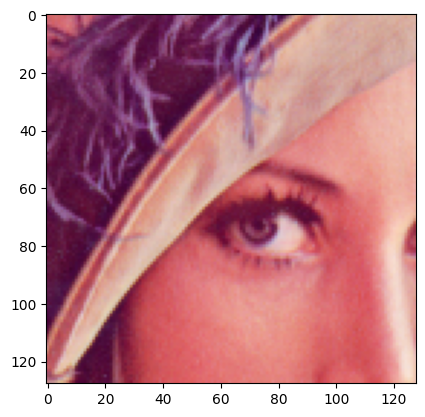

In [97]:
img_lenna = cv2.imread("./imgs/lenna.png")
H = img_lenna.shape[0]
W = img_lenna.shape[1]

img_lenna_trim = img_lenna[int(H/2-64):int(H/2+64), int(W/2-64):int(W/2+64)]

# 画像の形状の表示
print(img_lenna_trim.shape) # (height, width, channel)

# 画像の表示
plt.imshow(cv2.cvtColor(img_lenna_trim, cv2.COLOR_BGR2RGB))
cv2.imwrite("./imgs/exercise2_3.png", img_lenna_trim)
plt.show()

## 二値化

(512, 512)


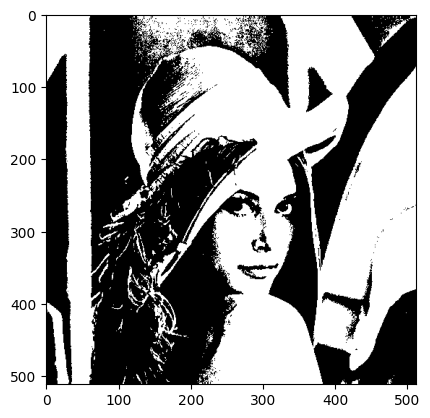

In [99]:
img_lenna = cv2.imread("./imgs/lenna.png")
img_lenna_gray = cv2.cvtColor(img_lenna, cv2.COLOR_BGR2GRAY) # BGR to GRAY

# 二値化
ret, img_lenna_gray_th = cv2.threshold(img_lenna_gray, 127, 255, cv2.THRESH_BINARY)
print(img_lenna_gray_th.shape) # (height, width)

# 画像の表示
plt.imshow(img_lenna_gray_th)
plt.gray()
plt.show()

### 演習 2-4：コインの画像またはCTデータに対し、公式ドキュメント を参考に、大津の二値化と適応的閾値処理を実装しなさい。また、それぞれの利点・欠点について考察しなさい。

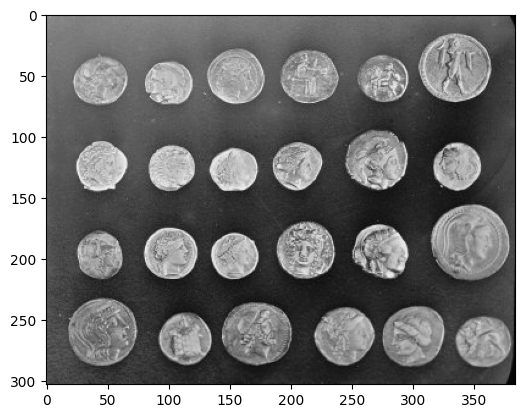

In [100]:
img_coins = cv2.imread("./imgs/coins.png")
img_coins_gray = cv2.cvtColor(img_coins, cv2.COLOR_BGR2GRAY) # BGR to GRAY

# 表示
plt.imshow(img_coins_gray)
plt.gray()
plt.show()

In [104]:
def otsus_binarization(img):
    max_sigma = 0
    max_t = 0

    # ヒストグラムの取得
    H, W = img.shape
    hist = [0] * 256
    for y in range(H):
        for x in range(W):
            hist[img[y, x]] += 1

    # 閾値t=0~255まで試す
    for t in range(1, 255):
        # クラス1とクラス2の画素数を計算
        n1 = 0
        mu1 = 0
        for i in range(t):
            n1 += hist[i]
            mu1 += i * hist[i]
        
        if n1 == 0:
            continue
        mu1 /= n1

        n2 = 0
        mu2 = 0
        for i in range(t, 255):
            n2 += hist[i]
            mu2 += i * hist[i]
        
        if n2 == 0:
            continue
        mu2 /= n2

        # クラス間分散sigma_wを計算
        sigma_w = (n1 * n2) * (mu1 - mu2) ** 2

        # sigma_wが最大のとき、閾値を更新
        if sigma_w > max_sigma:
            max_sigma = sigma_w
            max_t = t

    return max_t, hist

threshold >> 108


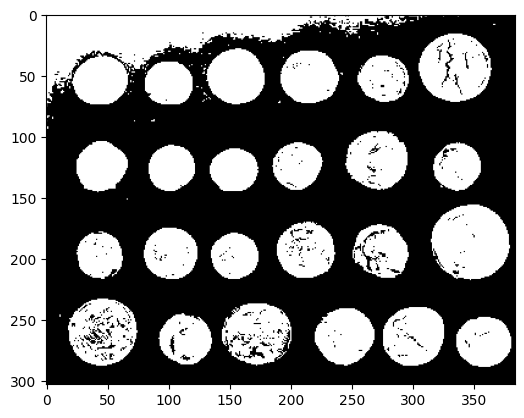

In [106]:
img_coins = cv2.imread("./imgs/coins.png")
img_coins_gray = cv2.cvtColor(img_coins, cv2.COLOR_BGR2GRAY) # BGR to GRAY

# 大津の二値化
th, hist = otsus_binarization(img_coins_gray)
ret, img_coins_otsu = cv2.threshold(img_coins_gray, th, 255, cv2.THRESH_BINARY)

# 結果を出力
print("threshold >>", th)
plt.imshow(img_coins_otsu)
plt.gray()
plt.show()


In [109]:
def adaptive_thresholding(img, type="mean", k=3, c=0):
    if type == "mean":
        # 平均値を計算
        img_mean = cv2.blur(img, (k, k))
        img_mean = img_mean - c
        img_th = img - img_mean
        img_th[img_th < 0] = 0
        img_th = img_th.astype(np.uint8)
    elif type == "gaussian":
        # ガウス分布による重み付け平均値を計算
        img_mean = cv2.GaussianBlur(img, (k, k), 0)
        img_mean = img_mean - c
        img_th = img - img_mean
        img_th[img_th < 0] = 0
        img_th = img_th.astype(np.uint8)
    else:
        print("Type Error")
        exit()

    return img_th

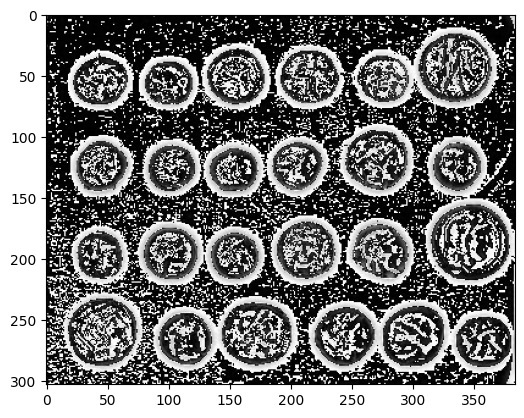

In [110]:
img_coins = cv2.imread("./imgs/coins.png")
img_coins_gray = cv2.cvtColor(img_coins, cv2.COLOR_BGR2GRAY) # BGR to GRAY

# 適応的二値化
img_coins_adapt = adaptive_thresholding(img_coins_gray, type="mean", k=11, c=2)

# 結果を出力
plt.imshow(img_coins_adapt)
plt.gray()
plt.show()

## フィルタ処理

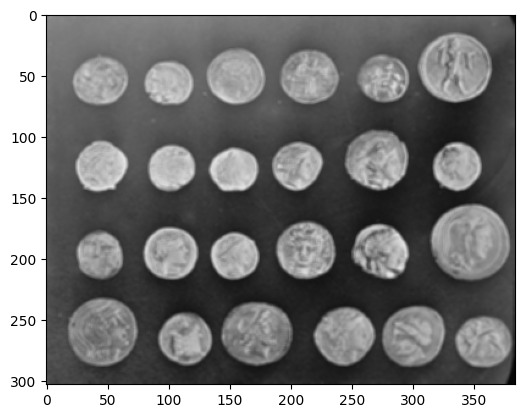

In [111]:
# 画像データの読み込み
img_coins = cv2.imread("./imgs/coins.png")

# 平均値フィルタ
filter = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]]) / 9
img_filtered = cv2.filter2D(img_coins, -1, filter)

# 画像の表示
plt.imshow(img_filtered)
plt.show()

In [115]:
# 4近傍鮮鋭化フィルタ
filter4 = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# 8近傍鮮鋭化フィルタ
filter8 = np.array([[-1, -1,-1],
                    [-1, 9, -1],
                    [-1, -1, -1]])

# ラプラシアンフィルタ
filter_lap = np.array([[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]])


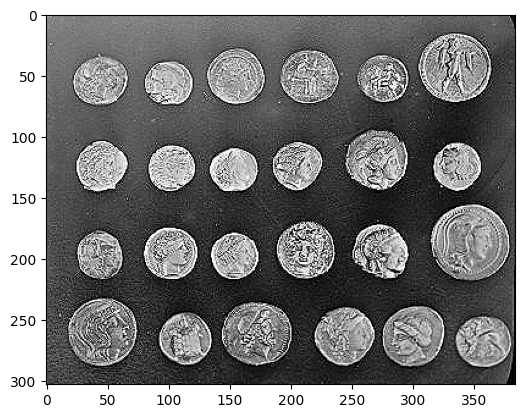

In [113]:
# 画像データの読み込み
img_coins = cv2.imread("./imgs/coins.png")

img_filtered = cv2.filter2D(img_coins, -1, filter4)

# 画像の表示
plt.imshow(img_filtered)
plt.show()

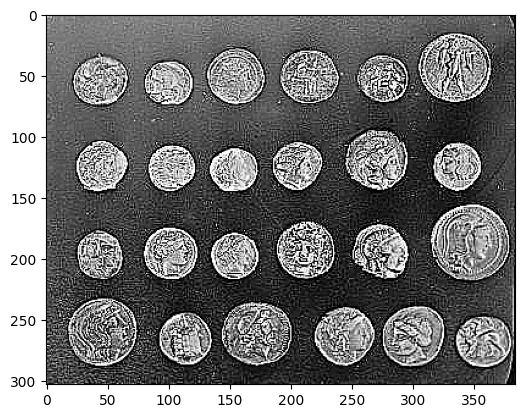

In [114]:
# 画像データの読み込み
img_coins = cv2.imread("./imgs/coins.png")

img_filtered = cv2.filter2D(img_coins, -1, filter8)

# 画像の表示
plt.imshow(img_filtered)
plt.show()

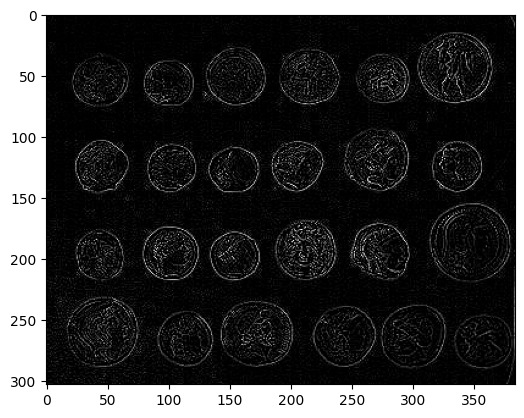

In [116]:
# 画像データの読み込み
img_coins = cv2.imread("./imgs/coins.png")

img_filtered = cv2.filter2D(img_coins, -1, filter_lap)

# 画像の表示
plt.imshow(img_filtered)
plt.show()

## モルフォロジー演算

## 画像の水増し